In [3]:
!pip install pandas

  Using cached pandas-2.1.3-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [23]:
import os
import pickle
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from genetic import fitness

In [62]:
def is_valid(g, s):
    return all(sum(s[v_int] for v in g[n] if (v_int := int(v))) >= 2
               for n in g
               if (n_int := int(n)) and not s[n_int])


### Experimento 1

In [63]:
results = "../results_2"

data = defaultdict(dict)

for filename in os.listdir(results):
    if filename.endswith('.graphml'):
        file_path = os.path.join(results, filename)
        G = nx.read_graphml(file_path)
        index = int(filename.split('.')[0])
        data[index]['g'] = G
    if filename.endswith('.pkl'):
        file_path = os.path.join(results, filename)
        with open(file_path, 'rb') as file:
            r = pickle.load(file)
            index = int(filename.split('.')[0])
            data[index].update(r)

In [64]:
data = pd.DataFrame(data).T
data.sort_index(inplace=True)
data.dropna(inplace=True)
data

,g,alg,alg_t,gen,gen_t
2,"(0, 1)","{0, 1}",0.086398,"{0, 1}",0.047372
4,"(0, 1, 2, 3)","{1, 2, 3}",0.008921,"{0, 1, 3}",0.056277
8,"(0, 1, 2, 3, 4, 5, 6, 7)","{1, 2, 4, 6, 7}",0.009118,"{1, 2, 4, 6, 7}",0.076081
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15}",0.009584,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",0.113749
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.010133,"{0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 1...",0.190414
64,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{2, 3, 4, 6, 7, 8, 10, 12, 13, 15, 17, 19, 21,...",0.010577,"{2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, ...",0.343451
128,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{1, 3, 4, 6, 8, 10, 11, 13, 14, 15, 17, 19, 20...",0.013532,"{1, 3, 4, 6, 7, 8, 11, 12, 13, 15, 16, 19, 20,...",0.651665
256,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19,...",0.023078,"{1, 3, 4, 7, 9, 11, 12, 13, 15, 16, 17, 19, 20...",1.272403
512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{1, 2, 4, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18,...",0.06161,"{1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 16, 18, 21,...",2.503677
1024,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 15, 17, ...",0.247051,"{1, 2, 4, 6, 7, 9, 11, 12, 13, 14, 16, 17, 18,...",5.115342


In [67]:
def a_is_valid(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return is_valid(d['g'], s_list)

def a_fitness(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return fitness(d['g'], s_list)

In [75]:
data['alg_f'] = data.apply(a_fitness, axis=1, args=('alg', ))
data['gen_f'] = data.apply(a_fitness, axis=1, args=('gen', ))
data['gen_v'] = data.apply(a_is_valid, axis=1, args=('gen', ))
data

,g,alg,alg_t,gen,gen_t,alg_f,gen_f,gen_v
2,"(0, 1)","{0, 1}",0.086398,"{0, 1}",0.047372,1,1,True
4,"(0, 1, 2, 3)","{1, 2, 3}",0.008921,"{0, 1, 3}",0.056277,2,2,False
8,"(0, 1, 2, 3, 4, 5, 6, 7)","{1, 2, 4, 6, 7}",0.009118,"{1, 2, 4, 6, 7}",0.076081,6,6,True
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15}",0.009584,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",0.113749,11,13,True
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.010133,"{0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 1...",0.190414,19,23,False
64,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{2, 3, 4, 6, 7, 8, 10, 12, 13, 15, 17, 19, 21,...",0.010577,"{2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, ...",0.343451,49,41,False
128,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{1, 3, 4, 6, 8, 10, 11, 13, 14, 15, 17, 19, 20...",0.013532,"{1, 3, 4, 6, 7, 8, 11, 12, 13, 15, 16, 19, 20,...",0.651665,97,67,False
256,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19,...",0.023078,"{1, 3, 4, 7, 9, 11, 12, 13, 15, 16, 17, 19, 20...",1.272403,192,118,False
512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{1, 2, 4, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18,...",0.06161,"{1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 16, 18, 21,...",2.503677,396,223,False
1024,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 15, 17, ...",0.247051,"{1, 2, 4, 6, 7, 9, 11, 12, 13, 14, 16, 17, 18,...",5.115342,797,425,False


In [76]:
dt = data.iloc[10]
s = dt.alg
s_list = [n in s for n in dt.g]
fitness(dt.g, s_list)

0

In [70]:
s_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


<Axes: >

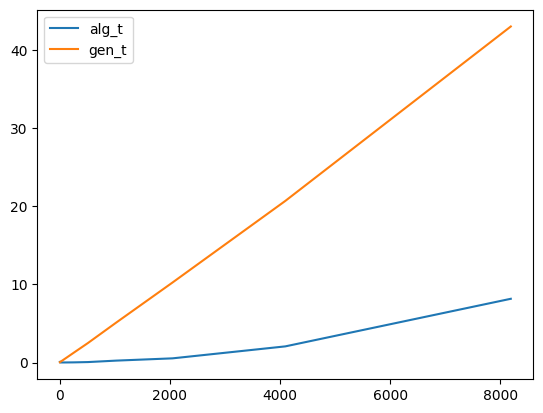

In [77]:
data[["alg_t", "gen_t"]].plot()

<Axes: >

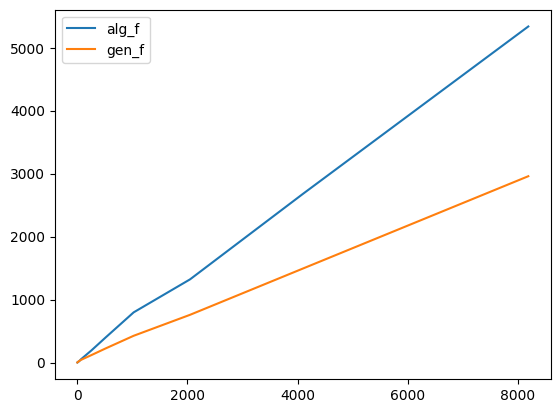

In [79]:
data[["alg_f", "gen_f"]].plot()

In [80]:
data.to_csv("a3")